# UNO Card Game Simulator

This is the steering console where simulations of the UNO card game can be executed. There are two different Reinforcement Learning Models implemented, which can be selected together with their respective model parameters.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Parameters" data-toc-modified-id="Parameters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Run</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Win-Rate" data-toc-modified-id="Win-Rate-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Win Rate</a></span></li><li><span><a href="#Q-Values" data-toc-modified-id="Q-Values-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Q-Values</a></span></li><li><span><a href="#Visits" data-toc-modified-id="Visits-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Visits</a></span></li><li><span><a href="#Possible-Moves" data-toc-modified-id="Possible-Moves-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Possible Moves</a></span></li></ul></li><li><span><a href="#Extraction" data-toc-modified-id="Extraction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Extraction</a></span></li></ul></div>

### Import
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns

sns.set()

In [2]:
def bold(string):
    chr_start = "\033[1m"
    chr_end = "\033[0m"
    print (chr_start + string + chr_end)
    
def underline(string):
    chr_start = "\033[4m"
    chr_end = "\033[0m"
    print(chr_start + string + chr_end)

In [3]:
def color_lib(categories):
    """
    This function generates a dictionary that assigns a specific color from a color spectrum to each fund.
    It enables consistent coloring across visualizations.
    """
    
    c_scale = cm.rainbow(np.linspace(0,1,len(categories)))
    c_dict = {}

    for i,c in zip(categories,c_scale):
        c_dict[i] = c
        
    return c_dict

### Analysis
***

In [4]:
df = pd.read_csv(r"C:\Users\sabri\CodingProjects\4511UNO_SIM\assets\color-change-monte-carlo-results.csv")
df.head()

,winner,turns,win_rate
0,Human,22,0.000000
1,AI,50,0.500000
2,Human,30,0.333333
3,Human,33,0.250000
4,Human,28,0.200000


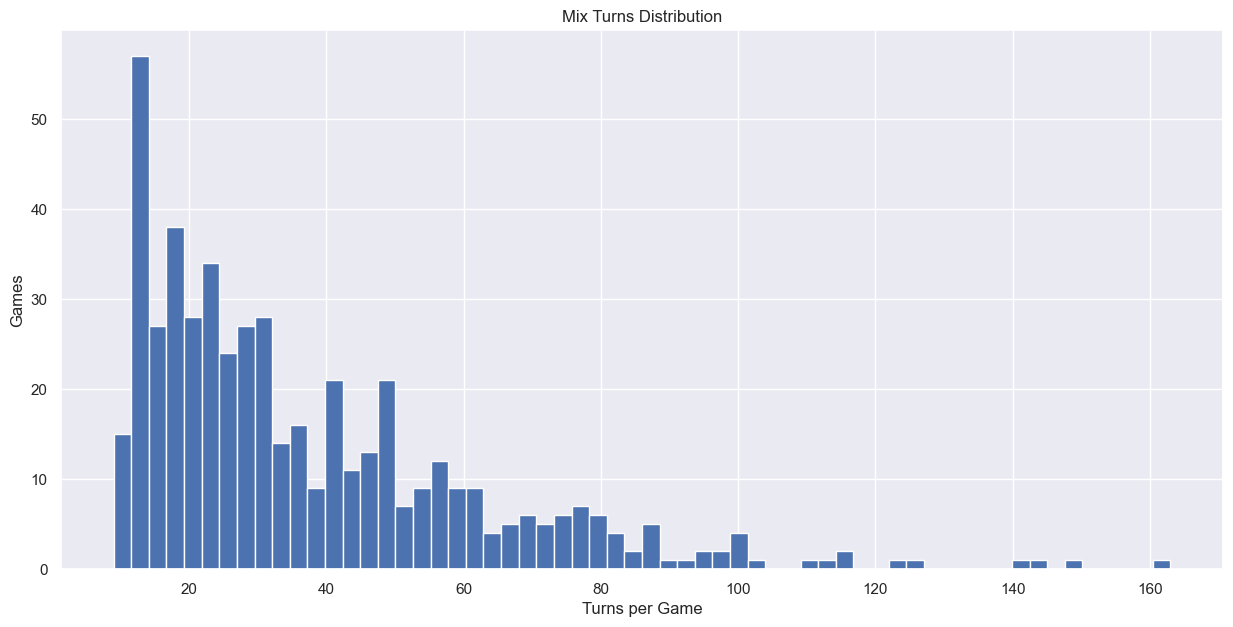

In [5]:
fig = plt.figure(1, figsize=(15,7))

plt.hist(df["turns"], bins =60, edgecolor = "w")
plt.title("Mix Turns Distribution")
plt.xlabel("Turns per Game")
plt.ylabel("Games")

plt.show()

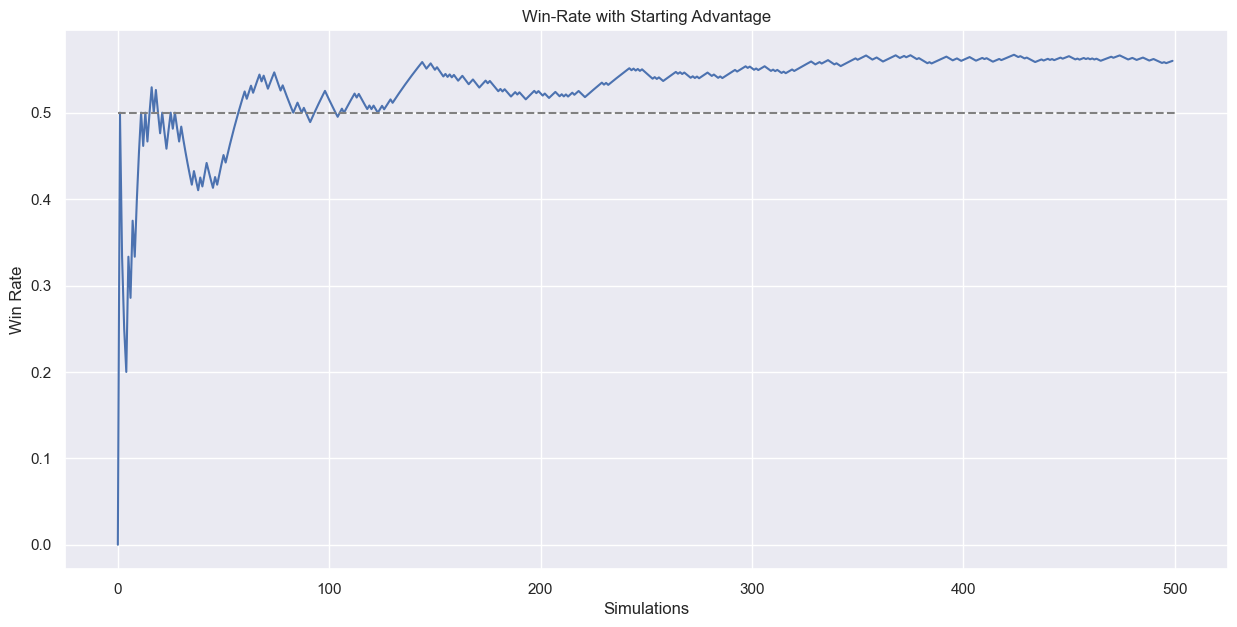

In [6]:
fig = plt.figure(1, figsize=(15,7))

plt.plot(df.index, df["win_rate"])
plt.hlines(0.5, 0, len(df), colors="grey", linestyles="dashed")

plt.title("Win-Rate with Starting Advantage")
plt.xlabel("Simulations")
plt.ylabel("Win Rate")
plt.show()

#### Q-Values

In [7]:
q_values = pd.read_csv('../assets/color-change-monte-carlo-q-values.csv',index_col='id')

actions = q_values.columns

q_values['MAX'] = q_values.max(axis=1)
q_values['ID'] = q_values.index
q_values['HAND'] = q_values['ID'].apply(lambda x: sum(eval(x)[1:]))

q_values.drop(columns='ID', inplace=True)
q_values.head(3)

,RED,GRE,BLU,YEL,SKI,REV,PL2,PL4,COL,MAX,HAND
id,,,,,,,,,,,
"('RED', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0
"('RED', 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.488,0.488,1
"('RED', 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,1


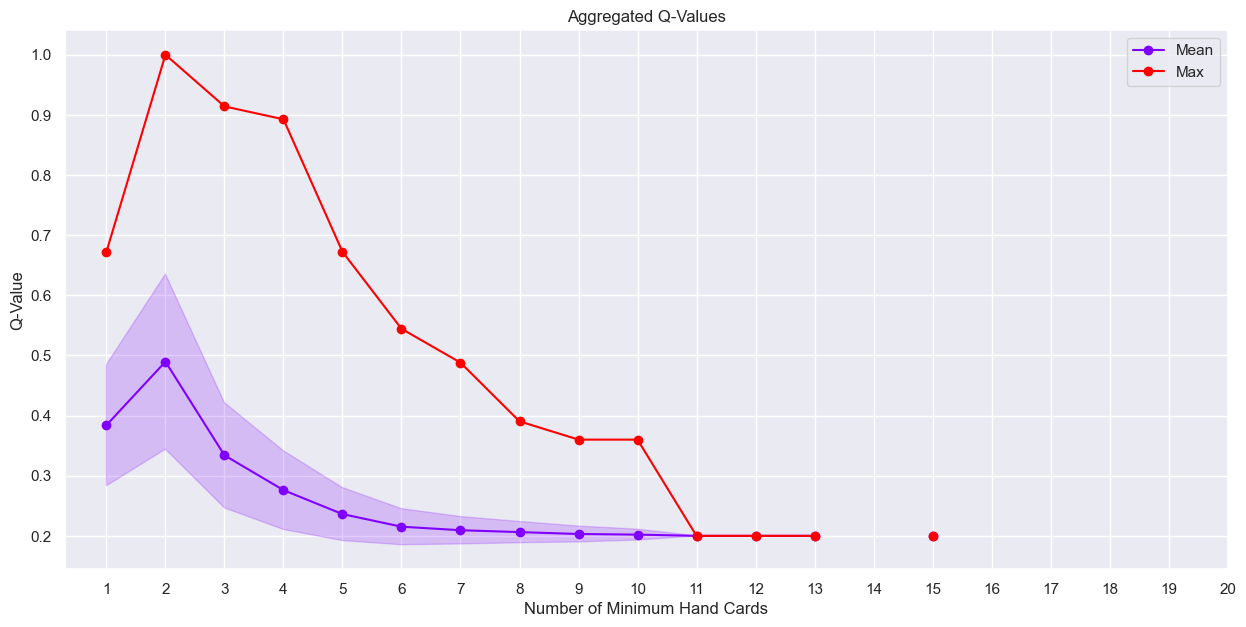

In [8]:
q_curve = q_values.copy()
q_curve[["HAND","MAX"]] = q_curve[["HAND","MAX"]].replace(0, np.NaN)

q_mean = pd.Series(q_curve.groupby("HAND").mean()["MAX"])
q_max  = pd.Series(q_curve.groupby("HAND").max()["MAX"])
q_std  = pd.Series(q_curve.groupby("HAND").std()["MAX"])/2

fig = plt.figure(1, figsize=(15,7))
colors = color_lib(["Mean","Max"])

plt.plot(q_mean.index, q_mean, label="Mean", marker = "o", c = colors["Mean"])
plt.plot(q_max.index,  q_max,  label="Max",  marker = "o", c = colors["Max"])
plt.fill_between(q_mean.index, q_mean-q_std, q_mean+q_std, color = colors["Mean"], alpha=0.2)

plt.xticks(q_mean.index)
plt.xlabel("Number of Minimum Hand Cards")
plt.ylabel("Q-Value")
plt.title("Aggregated Q-Values")
plt.legend()
plt.show()

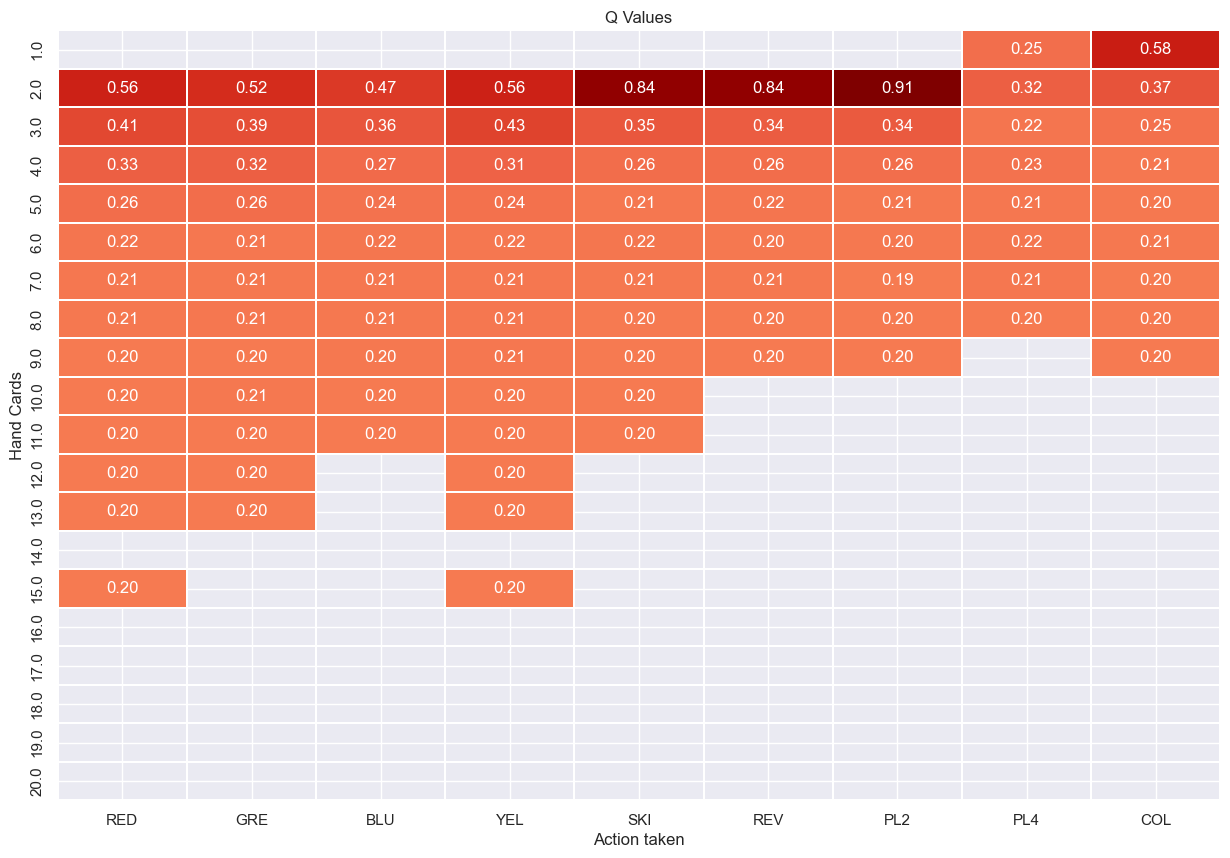

In [9]:
q_pivot = q_values.replace(0, np.NaN)
q_pivot = q_pivot.drop(columns='MAX').groupby("HAND").mean()

# Plotting
fig, ax = plt.subplots(1, 1, figsize = (15,10))

sns.heatmap(q_pivot, 
            fmt=".2f", 
            cmap = "OrRd", 
            linewidth = 0.3, 
            annot = True,
            cbar = False,
            center = 0.1)

ax.title.set_text("Q Values")
ax.set(xlabel="Action taken", ylabel="Hand Cards")
plt.show()

Win Rates (%):
winner
AI       56.0
Human    44.0
Name: count, dtype: float64
Wins Summary:
winner
AI       280
Human    220
Name: count, dtype: int64

Average Turns Per Win:
winner
AI       36.167857
Human    38.950000
Name: turns, dtype: float64


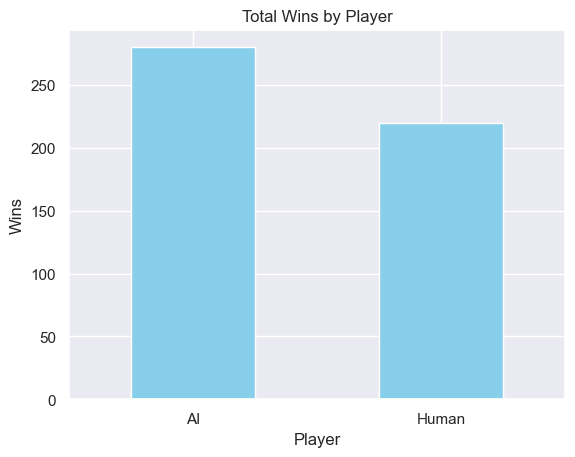

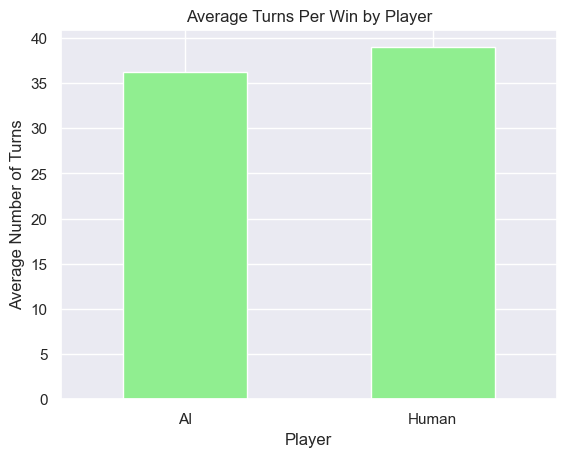

In [10]:
df = pd.read_csv(r"C:\Users\sabri\CodingProjects\4511UNO_SIM\assets\color-change-monte-carlo-results.csv")

# Calculate wins for each player
wins_summary = df['winner'].value_counts()

# Calculate average turns per win for each player
average_turns_per_win = df.groupby('winner')['turns'].mean()

# Calculate total number of games
total_games = len(df)

# Calculate win rate as a percentage
win_rates = (wins_summary / total_games) * 100

# Display results
print("Win Rates (%):")
print(win_rates)

# Display results
print("Wins Summary:")
print(wins_summary)
print("\nAverage Turns Per Win:")
print(average_turns_per_win)

wins_summary.plot(kind='bar', color='skyblue')
plt.title('Total Wins by Player')
plt.xlabel('Player')
plt.ylabel('Wins')
plt.xticks(rotation=0)
plt.show()

# Bar plot for average turns per win
average_turns_per_win.plot(kind='bar', color='lightgreen')
plt.title('Average Turns Per Win by Player')
plt.xlabel('Player')
plt.ylabel('Average Number of Turns')
plt.xticks(rotation=0)
plt.show()